In [30]:
#loading and importing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler


# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])


df_train=pd.read_csv('KDDTrain+.txt',header=None,names=columns)
df_test=pd.read_csv('KDDTest+.txt',header=None,names=columns)

In [ ]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [ ]:
# information of our data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [ ]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

KeyboardInterrupt: 

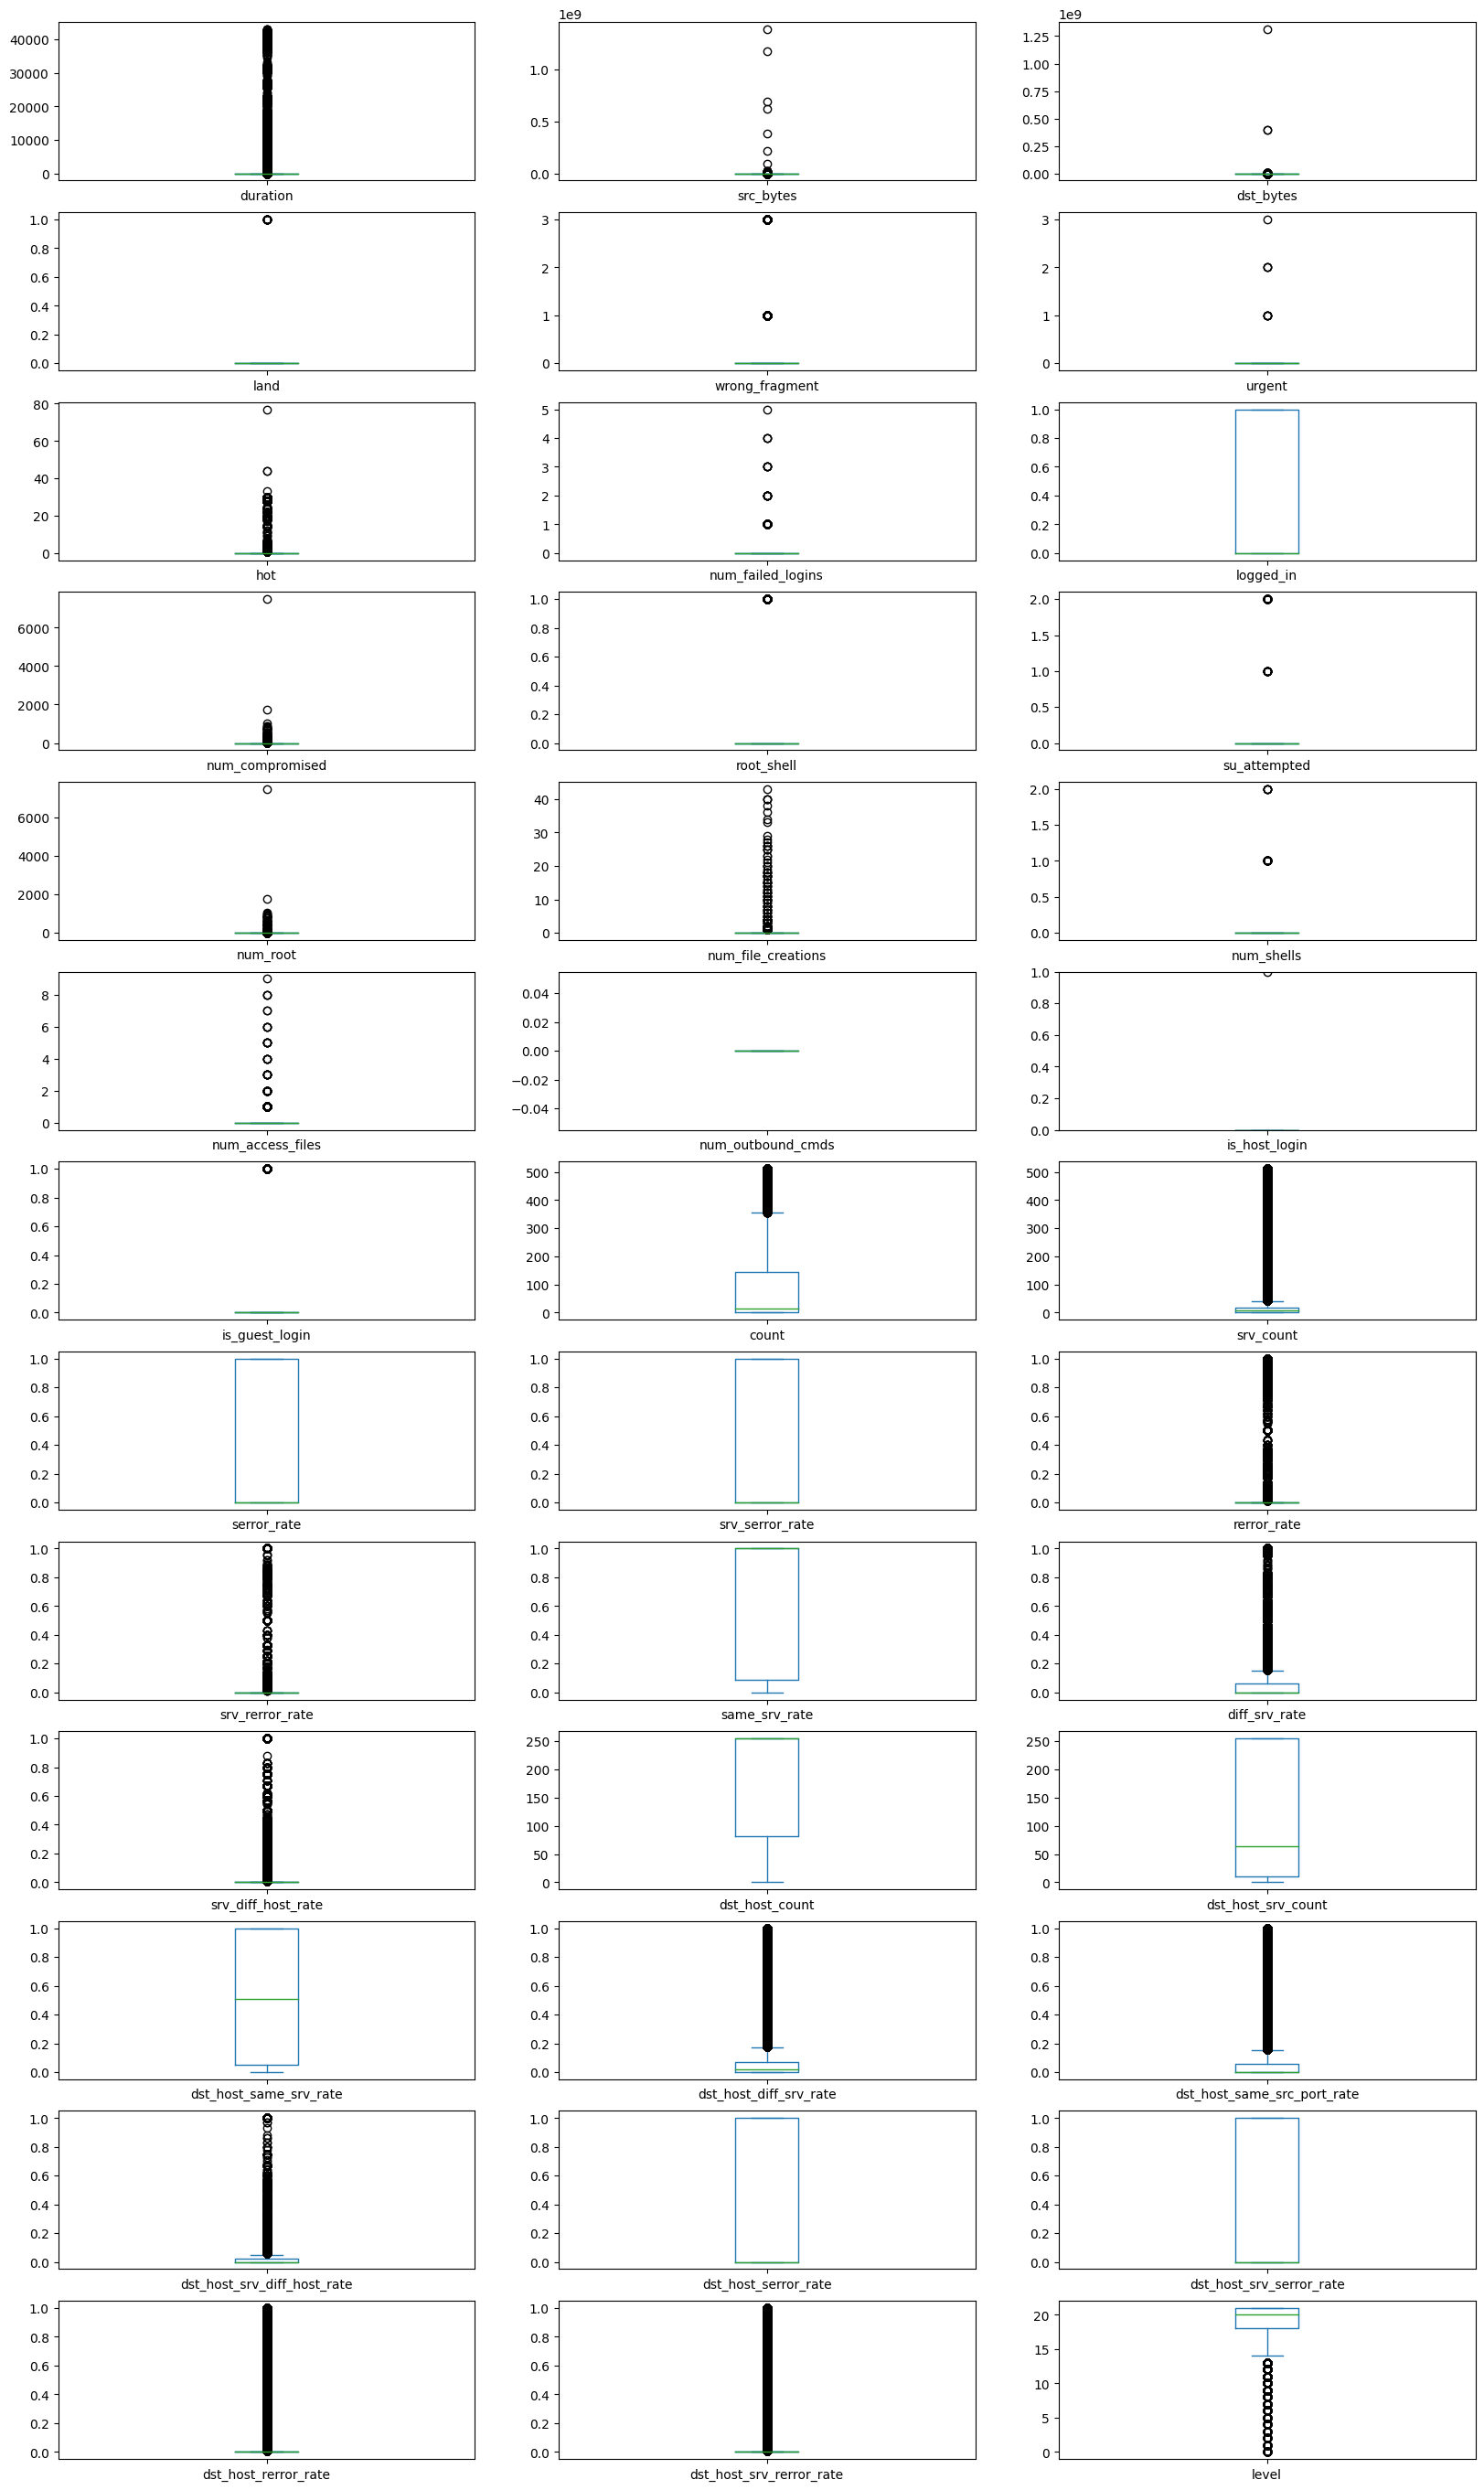

In [ ]:
df_train.plot(kind='box', subplots=True, layout=(15,3), figsize=(20,40))
plt.show()

In [ ]:
df_train['attack'].value_counts()

attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [31]:
# I will convert other abnormal classes to one class

df_train["binary_attack"]=df_train.attack.map(lambda a: "normal" if a == 'normal' else "abnormal")
df_train.drop('attack',axis=1,inplace=True)

df_test["binary_attack"]=df_test.attack.map(lambda a: "normal" if a == 'normal' else "abnormal")
df_test.drop('attack',axis=1,inplace=True)

In [32]:
df_train['binary_attack'].value_counts()

binary_attack
normal      67343
abnormal    58630
Name: count, dtype: int64

In [ ]:
df_train.select_dtypes(['object']).columns

Index(['protocol_type', 'service', 'flag', 'binary_attack'], dtype='object')

In [33]:
# Label Encoder
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'binary_attack']
for x in clm:
    df_train[x]=le.fit_transform(df_train[x])
    df_test[x]=le.fit_transform(df_test[x])

In [34]:
#Spliting the data

x_train=df_train.drop('binary_attack',axis=1)
y_train=df_train["binary_attack"]

x_test=df_test.drop('binary_attack',axis=1)
y_test=df_test["binary_attack"]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.566889
service                        0.469678
dst_bytes                      0.439780
flag                           0.369623
same_srv_rate                  0.367397
diff_srv_rate                  0.360776
dst_host_srv_count             0.336332
dst_host_same_srv_rate         0.311702
logged_in                      0.294073
dst_host_serror_rate           0.287744
dst_host_diff_srv_rate         0.284800
dst_host_srv_serror_rate       0.280889
serror_rate                    0.278157
srv_serror_rate                0.266564
count                          0.265124
dst_host_srv_diff_host_rate    0.189679
level                          0.151997
dst_host_count                 0.145968
dst_host_same_src_port_rate    0.130974
srv_diff_host_rate             0.097199
srv_count                      0.064100
dst_host_srv_rerror_rate       0.061737
protocol_type                  0.054898
rerror_rate                    0.038798
dst_host_rerror_rate           0.038164


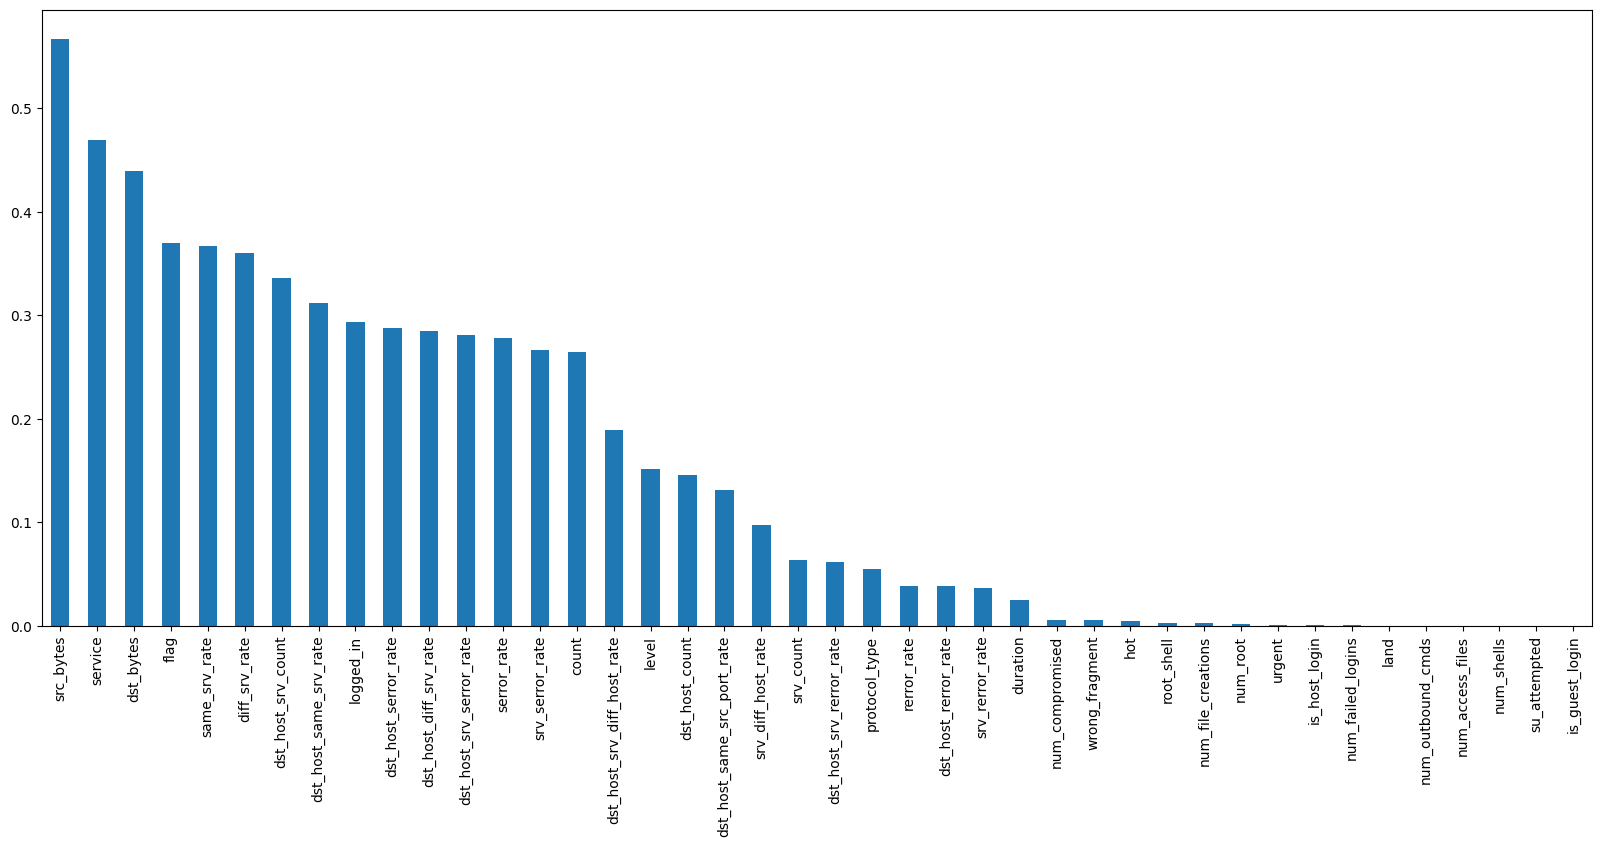

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [ ]:
# I will choose 20 features to select
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

In [ ]:
col=['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']
x_train=x_train[col]
x_test=x_test[col]

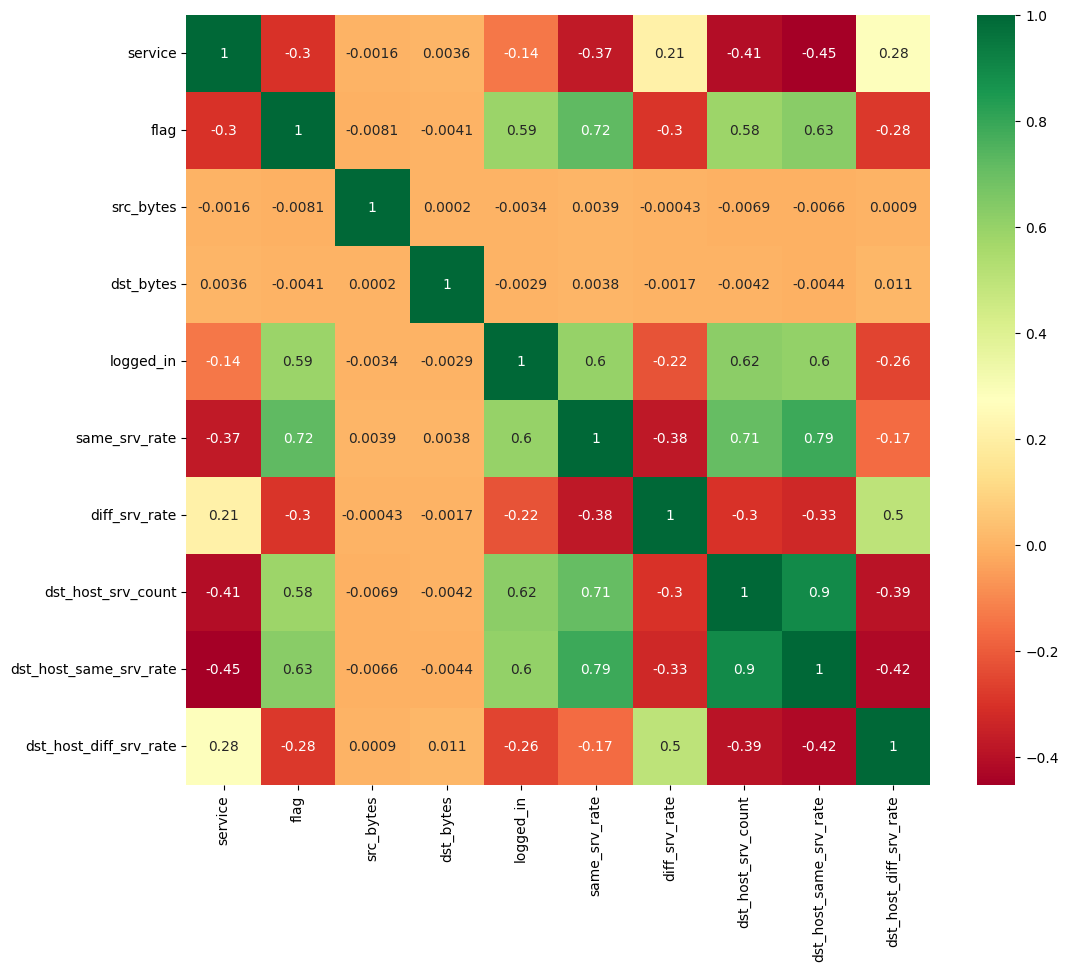

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(x_train.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

In [ ]:
# we'll initialize each model and store it by name in a dictionary
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines linear'] = LinearSVC()
models['Support Vector Machines plonomial'] = SVC(kernel='poly')
models['Support Vector Machines RBf'] =  SVC(C=100.0)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(max_depth=3)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)

In [26]:
# we'll loop over each one, train it by calling .fit(), make predictions, calculate metrics, and store each result in a dictionary.

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier
    models[key].fit(x_train, y_train)

    # Make predictions
    predictions = models[key].predict(x_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [27]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.717042,0.943569,0.611111
Support Vector Machines linear,0.723873,0.955617,0.615630
Support Vector Machines plonomial,0.764372,0.962723,0.653822
Support Vector Machines RBf,0.772933,0.957368,0.663977
Decision Trees,0.823013,0.840902,0.769579
Random Forest,0.757541,0.969828,0.645466
Naive Bayes,0.546265,0.440634,0.471463
K-Nearest Neighbor,0.788946,0.962002,0.680358


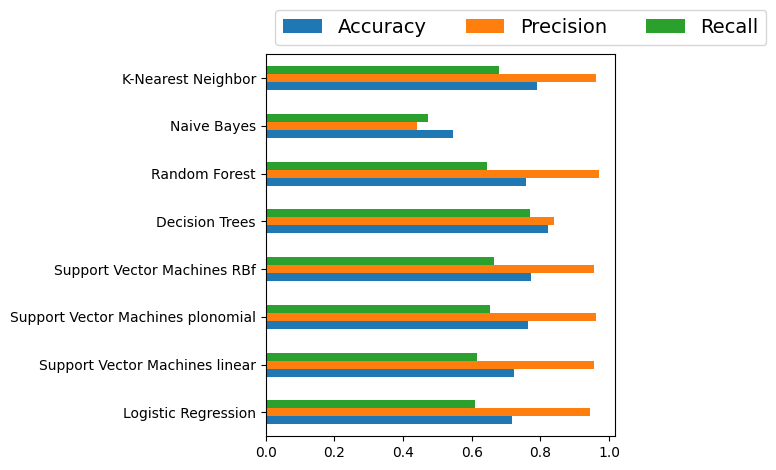

In [28]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 14}
)
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


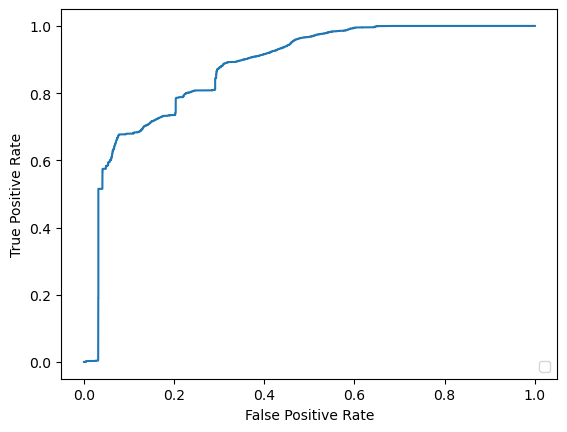

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


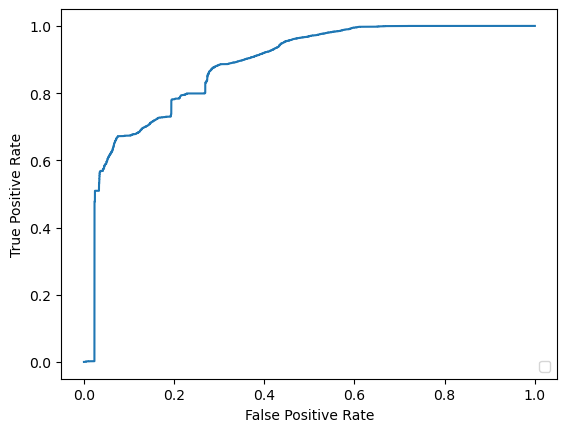

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


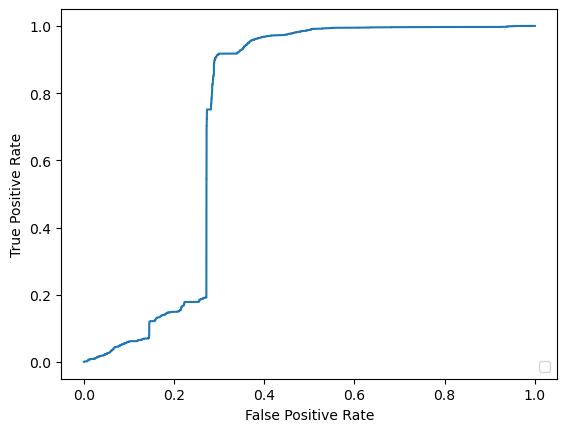

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


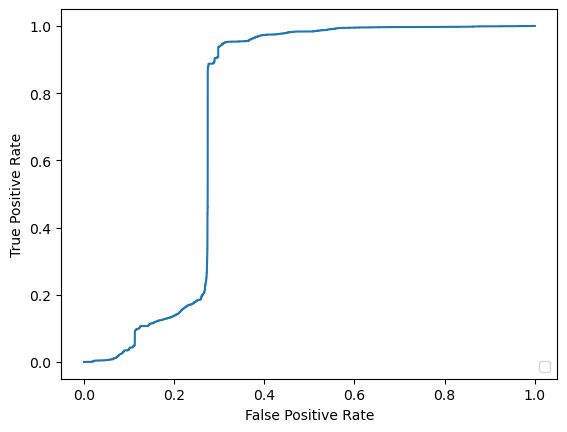

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


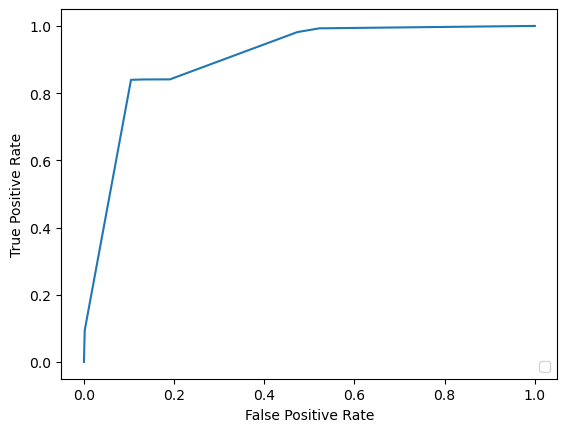

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


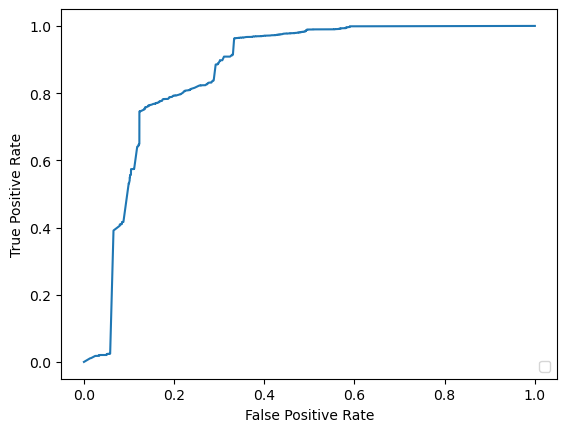

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


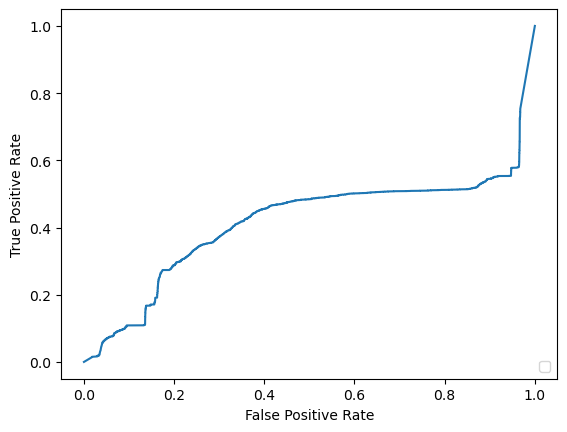

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


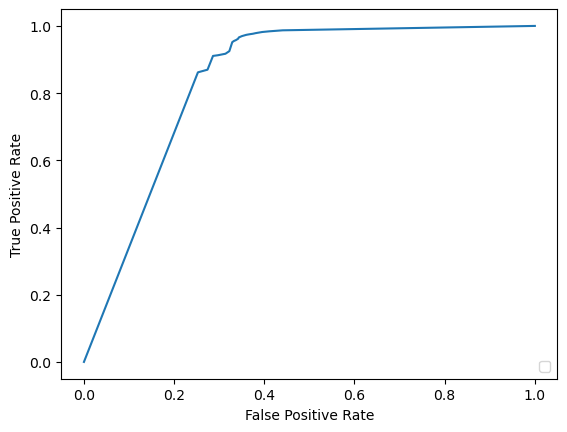

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve

for key in models.keys():
    if hasattr(models[key], "predict_proba"):
        y_pred_proba = models[key].predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    elif hasattr(models[key], "decision_function"):
        y_pred_decision = models[key].decision_function(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred_decision)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    else:
        print(f"Cannot compute ROC curve for model {key}")

    plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Create PCA object
num_components = 3
pca = PCA(n_components=num_components)

#Fit PCA to training data
pca.fit(x_train)

#Transform training and testing data
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

(22544, 10)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='leaky_relu', input_shape=(x_train_pca.shape[1:]),
                          kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01),
                          bias_regularizer=regularizers.L2(1e-3),
                          activity_regularizer=regularizers.L2(1e-5*4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GaussianDropout(0.6),
    tf.keras.layers.Dense(units=64, activation='leaky_relu',
                          kernel_regularizer=regularizers.L1L2(l1=0.1, l2=0.1),
                          bias_regularizer=regularizers.L2(1e-3),
                          activity_regularizer=regularizers.L2(1e-5*4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GaussianDropout(0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=False, label_smoothing=0.01), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 128)               512       
                                                                 
 batch_normalization_52 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 gaussian_dropout_30 (Gauss  (None, 128)               0         
 ianDropout)                                                     
                                                                 
 dense_79 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_53 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                     

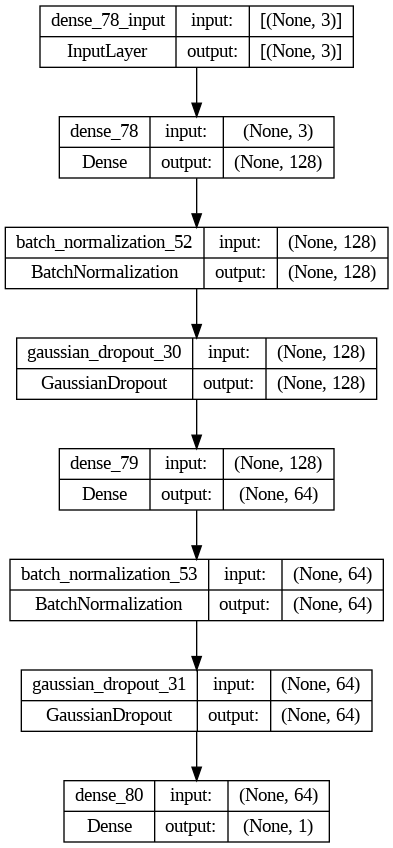

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
history = model.fit(x_train_pca, y_train, validation_data=(x_test_pca, y_test), epochs=20, verbose=1, callbacks=[callback])

Epoch 1/20
3937/3937 [==============================] - 19s 4ms/step - loss: 1.4903 - accuracy: 0.8652 - val_loss: 0.2808 - val_accuracy: 0.7239
Epoch 2/20
3937/3937 [==============================] - 14s 4ms/step - loss: 0.2136 - accuracy: 0.8698 - val_loss: 0.2909 - val_accuracy: 0.7590
Epoch 3/20
3937/3937 [==============================] - 14s 4ms/step - loss: 0.2154 - accuracy: 0.8708 - val_loss: 0.2556 - val_accuracy: 0.7233
Epoch 4/20
3937/3937 [==============================] - 14s 4ms/step - loss: 0.2137 - accuracy: 0.8699 - val_loss: 0.3505 - val_accuracy: 0.7039
Epoch 5/20
3937/3937 [==============================] - 13s 3ms/step - loss: 0.2128 - accuracy: 0.8698 - val_loss: 0.2843 - val_accuracy: 0.7222
Epoch 6/20
3937/3937 [==============================] - 13s 3ms/step - loss: 0.2120 - accuracy: 0.8689 - val_loss: 0.2718 - val_accuracy: 0.7334
Epoch 7/20
3937/3937 [==============================] - 14s 3ms/step - loss: 0.2118 - accuracy: 0.8699 - val_loss: 0.2686 - val_ac

In [ ]:
def average(arr):
  return sum(arr)/len(arr)

In [ ]:
loss_avg = average(history.history['loss'])
val_loss_avg = average(history.history['val_loss'])

In [ ]:
loss_arr = []
val_loss_arr = []

In [ ]:

loss_arr.append(loss_avg)
val_loss_arr.append(val_loss_avg)

In [ ]:
print(loss_arr[-10:])
print(val_loss_arr[-10:])

[0.48654794692993164, 0.5717660089333853, 0.4891516736575535, 0.3186919465661049, 0.13064413145184517, 0.32875973482926685, 0.26795537063949987, 0.32455776225436817, 0.22621024996042252, 0.31115680589125705]
[0.8149485247475761, 0.7127480705579122, 0.7147796835218158, 0.3270150050520897, 0.2267974428832531, 0.27526987964908284, 0.2948084316755596, 0.2934360978278247, 0.272715812921524, 0.28634192508000594]


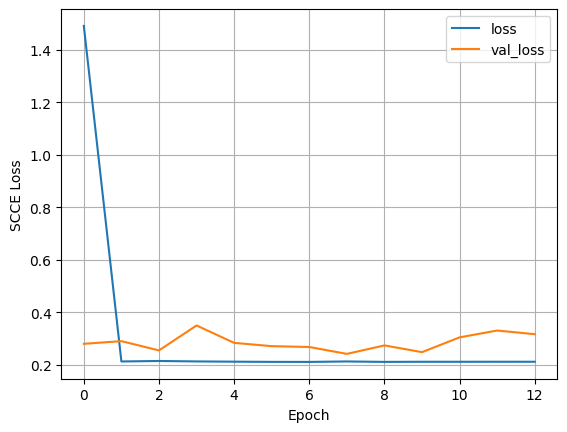

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

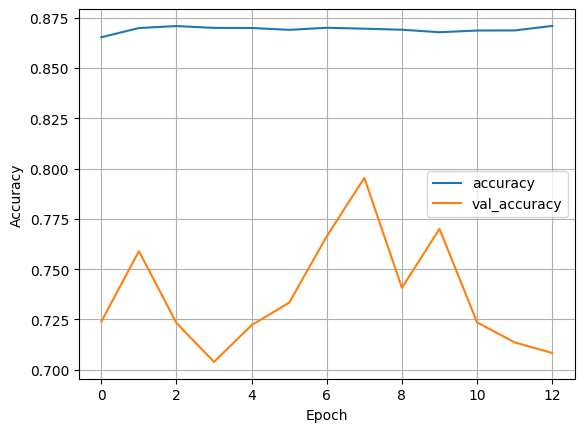

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
# Make predictions: obtain probabilities and convert to classes
predictions_proba = model.predict(x_test_pca)  # Get class probabilities
predictions = tf.math.argmax(predictions_proba, axis=1)  # Convert probabilities to classes

# Handle potential Series type for y_test
if isinstance(y_test, pd.Series):
  # Convert Series to NumPy array for reshaping
  y_testnp = y_test.to_numpy()
  # Reshape y_test to have the same number of rows as predictions
  y_testnp = y_testnp.reshape(-1, 1)

# Calculate confusion matrix (fixed the issue)
confusion_matrix = confusion_matrix(y_test, predictions)  # Use y_testnp directly

# Print the confusion matrix
print(confusion_matrix)

705/705 [==============================] - 4s 5ms/step


TypeError: 'numpy.ndarray' object is not callable

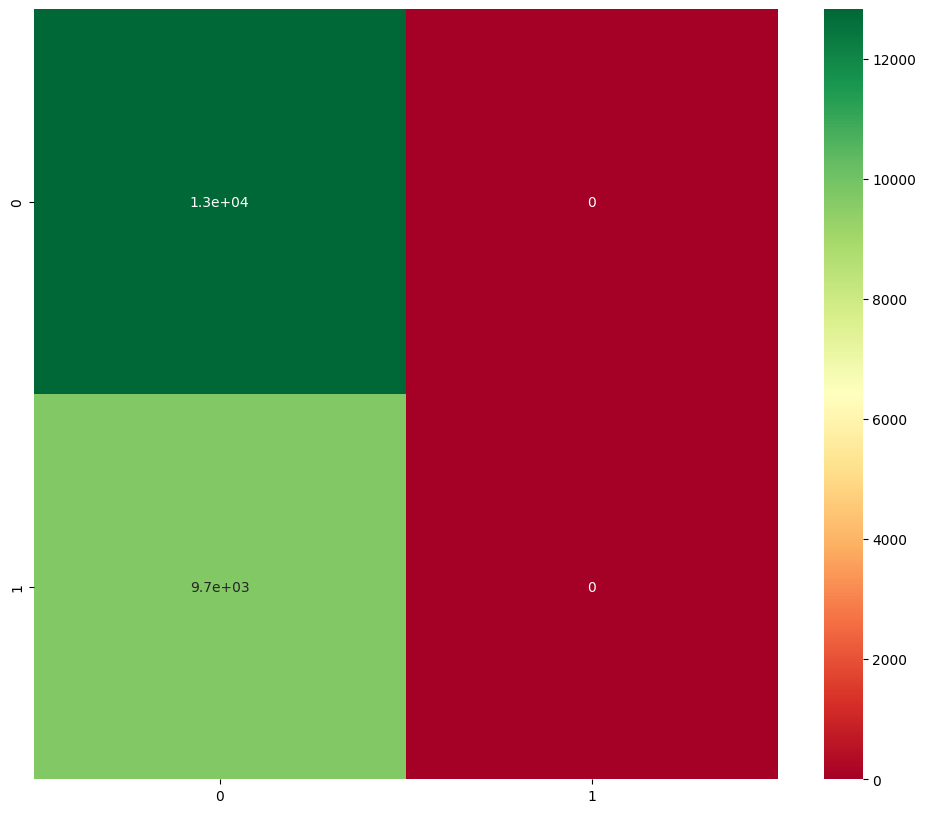

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(confusion_matrix, annot=True,cmap ='RdYlGn')